# Project Idea
### PART 1: Prediction of player position given the position data
   1. Acceleration, velocity, position, number of other player same types, player type, orientation, direction, and frametype with nflid (bool to drop data) as prediction parameters
   2. Actual position after a set period as validation data
   3. Will focus on predicting the position based on current movement end of snap state
   4. K-means (or K-neighbors), and Random forest can be used

### Part 2: Defensive Adjustment Prediction
Build a model that anticipates how the defense will adjust to offensive pre-snap motions, given the predictions found in part 1


### New Idea
Based on total movement/per-position movement/some other stuff can we predict if play type will be run or pass, how much win probabability will be added, likelihood of scoring, etc

### Packages
- Pandas
- scikit-learn
- matplotlib

## Final Model

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, TunedThresholdClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib as plt

In [2]:
constructedData = pd.read_csv('../MAIN/Combining Data/combined_data.csv')

In [10]:
cols_rf = [colHeader for colHeader in list(constructedData.columns) 
            if (
               colHeader.startswith('distance') and 
               (colHeader not in ['distance_OLB', 'distance_DT', 'distance_ILB', 'distance_FS'])
            )
          ] + ['isDropback']
data_rf = constructedData[cols_rf].dropna()
X = data_rf.drop(['isDropback'], axis=1)
y = data_rf['isDropback']
XTrain_clf, XTest_clf, yTrain_clf, yTest_clf = train_test_split(X, y)

### Random Forest

In [11]:
pipeline_randomForest= Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced', max_depth=12))
])
pipeline_randomForest.fit(XTrain_clf, yTrain_clf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_depth=12))])

#### Training Set Accuracy

Accuracy: 0.8597898916370253
              precision    recall  f1-score   support

       False       0.81      0.84      0.83      4816
        True       0.89      0.87      0.88      7273

    accuracy                           0.86     12089
   macro avg       0.85      0.86      0.85     12089
weighted avg       0.86      0.86      0.86     12089



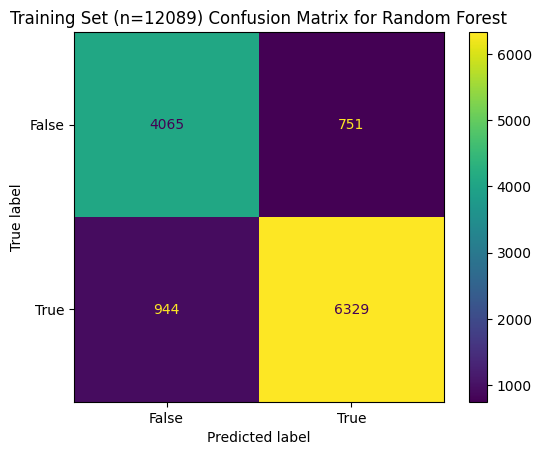

In [12]:
predicted_training_randomForest = pipeline_randomForest.predict(XTrain_clf)
print(f'Accuracy: {metrics.accuracy_score(yTrain_clf, predicted_training_randomForest)}')
print(classification_report(yTrain_clf, predicted_training_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTrain_clf, predicted_training_randomForest)
plt.pyplot.title(f'Training Set (n={XTrain_clf.shape[0]}) Confusion Matrix for Random Forest')
plt.pyplot.show()

#### Test Set Accuracy

Test
Accuracy: 0.6893300248138958
              precision    recall  f1-score   support

       False       0.60      0.59      0.60      1572
        True       0.74      0.75      0.75      2458

    accuracy                           0.69      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.69      0.69      0.69      4030



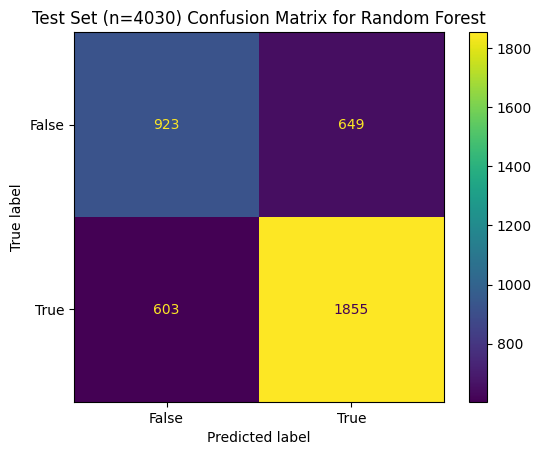

In [15]:
print('Test')
predicted_test_randomForest = pipeline_randomForest.predict(XTest_clf)
y_probs_rf = pipeline_randomForest.predict_proba(XTest_clf)[:, 1]
print(f'Accuracy: {metrics.accuracy_score(yTest_clf, predicted_test_randomForest)}')
print(classification_report(yTest_clf, predicted_test_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTest_clf, predicted_test_randomForest)
plt.pyplot.title(f'Test Set (n={XTest_clf.shape[0]}) Confusion Matrix for Random Forest')
plt.pyplot.show()

### Cross-Validation Confirmation


In [17]:
f1_weighted_tunedThresholdCV_rf = TunedThresholdClassifierCV(pipeline_randomForest, scoring='f1_weighted').fit(XTrain_clf, yTrain_clf)

In [20]:
print(f1_weighted_tunedThresholdCV_rf.best_threshold_)

0.482362154089635


#### Training Accuracy

Accuracy: 0.850690710563322
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      4816
        True       0.87      0.88      0.88      7273

    accuracy                           0.85     12089
   macro avg       0.84      0.84      0.84     12089
weighted avg       0.85      0.85      0.85     12089



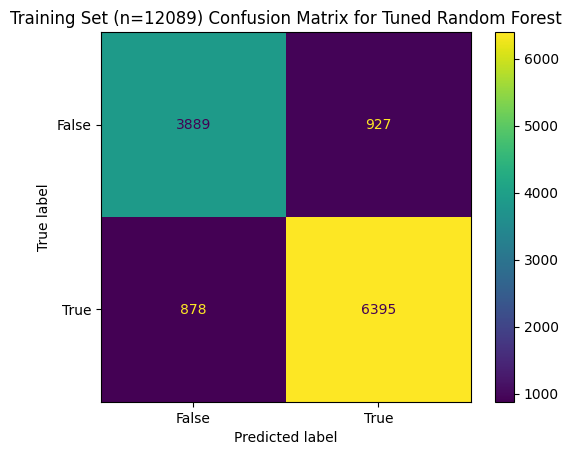

In [18]:
predicted_training_f1_weighted_randomForest = f1_weighted_tunedThresholdCV_rf.predict(XTrain_clf)
print(f'Accuracy: {metrics.accuracy_score(yTrain_clf, predicted_training_f1_weighted_randomForest)}')
print(classification_report(yTrain_clf, predicted_training_f1_weighted_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTrain_clf, predicted_training_f1_weighted_randomForest)
plt.pyplot.title(f'Training Set (n={XTrain_clf.shape[0]}) Confusion Matrix for Tuned Random Forest')
plt.pyplot.show()

#### Test Set Accuracy

Accuracy: 0.6933002481389579
              precision    recall  f1-score   support

       False       0.62      0.56      0.59      1572
        True       0.73      0.78      0.76      2458

    accuracy                           0.69      4030
   macro avg       0.68      0.67      0.67      4030
weighted avg       0.69      0.69      0.69      4030



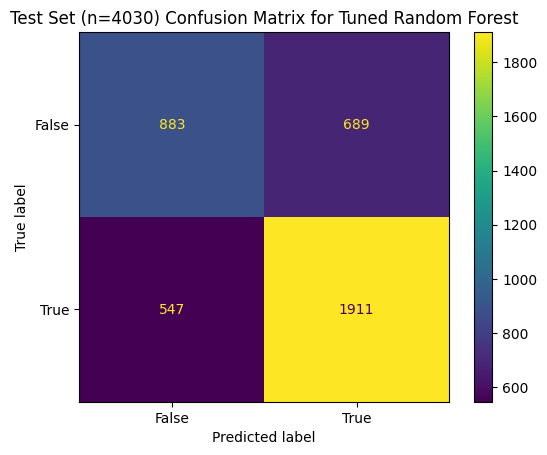

In [19]:
predicted_test_f1_weighted_randomForest = f1_weighted_tunedThresholdCV_rf.predict(XTest_clf)
print(f'Accuracy: {metrics.accuracy_score(yTest_clf, predicted_test_f1_weighted_randomForest)}')
print(classification_report(yTest_clf, predicted_test_f1_weighted_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTest_clf, predicted_test_f1_weighted_randomForest)
plt.pyplot.title(f'Test Set (n={XTest_clf.shape[0]}) Confusion Matrix for Tuned Random Forest')
plt.pyplot.show()